# Visualização dos microdados das matriculas da rede municipal de educação do município de SP

In [39]:
import pandas as pd

tabela = pd.read_csv('data/Microdados_EOL_Matriculas_Ano_2019.csv', encoding = "ISO-8859-1", sep = ';', chunksize=50000)

# y = pd.DataFrame(tabela)
y = 0

for x in tabela:
    y = x
    print(x)
    break

# Dados faltando
y = y.drop("DESC_CICLO_ENSINO", axis=1)
y = y.drop("DESC_TIPO_PROGRAMA", axis=1)
y = y.drop("CD_PARECER_CONCL_FIN", axis=1)
y = y.drop("DESC_PARECER_CONCL_FIN", axis=1)

# Não consta no dicionário de variáveis
y = y.drop("DUR_DIA_HORA", axis=1)
y = y.drop("DUR_DIA_MIN", axis=1)
# y = y.drop("X_SEMANA", axis=1)


       AN_LETIVO  CD_UNIDADE_EDUCACAO   NOME_DISTRITO  CD_SETOR   TIPO_ESCOLA  \
0           2019               308258        MARSILAC      5201  CR.P.CONV      
1           2019               309152      SAO MATEUS      7301  CR.P.CONV      
2           2019               309152      SAO MATEUS      7301  CR.P.CONV      
3           2019               700029     VILA CURUCA      8404  CEU AT COMPL   
4           2019               308028      SAO MIGUEL      7405  CR.P.CONV      
...          ...                  ...             ...       ...           ...   
49995       2019               308295        IGUATEMI      3302  CR.P.CONV      
49996       2019               400791     VILA CURUCA      8408  CEI INDIR      
49997       2019               307572          GRAJAU      3012  CR.P.CONV      
49998       2019                19502  ITAIM PAULISTA      3609  EMEI           
49999       2019               400630           PENHA      5902  CEI INDIR      

                        NOM

In [40]:
y["DUR_DIA_TURMA"] = pd.to_numeric(y["DUR_DIA_TURMA"], errors="coerce")

y = y.dropna(how="any", axis=0)
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41921 entries, 0 to 49999
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AN_LETIVO                 41921 non-null  int64  
 1   CD_UNIDADE_EDUCACAO       41921 non-null  int64  
 2   NOME_DISTRITO             41921 non-null  object 
 3   CD_SETOR                  41921 non-null  int64  
 4   TIPO_ESCOLA               41921 non-null  object 
 5   NOME_ESCOLA               41921 non-null  object 
 6   DRE                       41921 non-null  object 
 7   CD_INEP_ESCOLA            41921 non-null  float64
 8   SITUACAO_ESCOLA           41921 non-null  object 
 9   CD_TURMA                  41921 non-null  int64  
 10  CD_TURNO                  41921 non-null  int64  
 11  DESC_TURNO                41921 non-null  object 
 12  CD_SERIE                  41921 non-null  int64  
 13  DESC_SERIE                41921 non-null  object 
 14  MODALI

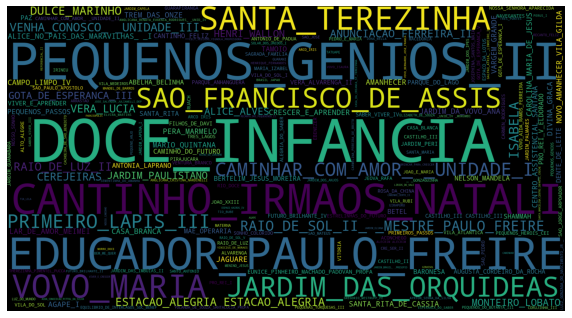

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = y['NOME_ESCOLA'].str.replace(',', '').str.replace(' ', '_').str.cat(sep=' ')
# print(text)
wordcloud = WordCloud(background_color="black",
                      width=1980, height=1080).generate(text)

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud)
wordcloud.to_file("summary_wordcloud.png")

In [42]:
import plotly.graph_objects as go
import numpy as np

labels = ['Aprovados', 'Reprovados', 'Abandono', 'Concluintes', 'Transferidos', 'Falecidos', 'Não comparecidos', 'Excluido', 'Cessado', 'Remanejado', 'Reclassificado', 'Ativo']
situacaoAluno = []

situacaoAluno.append(np.sum(y['SIT_AL_APROV']))
situacaoAluno.append(np.sum(y['SIT_AL_REPROV']))
situacaoAluno.append(np.sum(y['SIT_AL_ABAND']))
situacaoAluno.append(np.sum(y['SIT_AL_CONCL']))
situacaoAluno.append(np.sum(y['SIT_AL_TRANSF']))
situacaoAluno.append(np.sum(y['SIT_AL_FALEC']))
situacaoAluno.append(np.sum(y['SIT_AL_NCOM']))
situacaoAluno.append(np.sum(y['SIT_AL_EXCL']))
situacaoAluno.append(np.sum(y['SIT_AL_CES']))
situacaoAluno.append(np.sum(y['SIT_AL_REMAN']))
situacaoAluno.append(np.sum(y['SIT_AL_RECLAS']))
situacaoAluno.append(np.sum(y['SIT_AL_ATIVO']))

fig = go.Figure(data=[go.Pie(labels=labels, values=situacaoAluno)])
fig.show()


In [43]:
labels = ['Superdotação', 'Autismo', 'Surdez leve', 'Surdez severa', 'Interlectual', 'Multipla', 'Cegueira', 'Baixa visão', 'Surdo Cegueira', 'Transtorno degenerativo', 'Aspeger', 'Rett', 'Fisica não cadeirante', 'Fisica cadeirante', 'Não possui']
doencaAluno = []

doencaAluno.append(np.sum(y['NEE_ALT_HAB']))
doencaAluno.append(np.sum(y['DEF__AUTISMO']))
doencaAluno.append(np.sum(y['DEF__SURDEZ_LEVE']))
doencaAluno.append(np.sum(y['DEF__SURDEZ_SEV']))
doencaAluno.append(np.sum(y['DEF__INTELECT']))
doencaAluno.append(np.sum(y['DEF__MULTIPLA']))
doencaAluno.append(np.sum(y['DEF__CEGUEIRA']))
doencaAluno.append(np.sum(y['DEF__BAIXA_VISAO']))
doencaAluno.append(np.sum(y['DEF__SURDO_CEG']))
doencaAluno.append(np.sum(y['DEF__TRANST_DES_INF']))
doencaAluno.append(np.sum(y['DEF__SINDR_ASPER']))
doencaAluno.append(np.sum(y['DEF__SINDR_RETT']))
doencaAluno.append(np.sum(y['DEF__FIS_N_CADEIR']))
doencaAluno.append(np.sum(y['DEF__FIS_CADEIR']))
doencaAluno.append(np.sum(y['DEF__N_POSSUI']))

fig = go.Figure(data=[go.Pie(labels=labels, values=doencaAluno)])
fig.show()
